## What was the best Halloween costume you spotted in 2025? 🎃

### 1. Prolific Setup and Authentication
- Import required libraries
- Load API key from environment variables
- Authenticate and fetch your Prolific researcher ID

In [1]:
import os
import json
import yaml
import requests

import pandas as pd
import matplotlib.pyplot as plt

from prolific_helpers import (
    get_researcher_id,
    create_survey,
    create_study,
    publish_study,
    show_study_results,
    plot_survey_responses
)

In [2]:
# Load configuration
with open('config.yaml', 'r') as f:
    config = yaml.safe_load(f)

In [3]:
# Read API tokens for Jupyter Notebook
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
prolific_token = os.environ.get('PROLIFIC_API_TOKEN')
prolific_workspace = os.environ.get('PROLIFIC_WORKSPACE_ID')
prolific_project = os.environ.get('PROLIFIC_PROJECT_ID')

In [5]:
# Set up headers for authenticated requests to the Prolific API
headers = {
    "Authorization": f"Token {prolific_token}",
    "Content-Type": "application/json",
}

In [6]:
# Fetch your Prolific researcher ID
researcher_id = get_researcher_id(headers)

### 2. Survey Creation

In [7]:
# Build survey question from config
question_text = config['survey']['question_text']
print(question_text)

What costume do you think was the most unique this year?


In [8]:
# Create survey using helper function
survey_id = create_survey(headers, researcher_id, config['survey'])
print(f"Survey created with ID: {survey_id}")

Survey created with ID: 690bc81711e482a2f3d59105


### 3. Study Publication
- Create the study with all parameters
- Publish it to make it available to participants
- Monitor study status and participant recruitment

In [9]:
# Prepare study configuration from config.yaml
study_config = {
    "name": config['study']['name'],
    "description": config['study']['description'],
    "privacy_notice": config['study']['privacy_notice'],
    "reward": config['participants']['reward'],
    "participants": config['participants']['total_participants'],
    "estimated_time": config['participants']['estimated_time'],
    "max_time": config['participants']['max_time'],
    "device_compatibility": config['device_compatibility']
}

# Create study using helper function
study_id = create_study(headers, survey_id, study_config, prolific_project)
print(f"Study created with ID: {study_id}")

Study created with ID: 690bc83d437dbb1ec96bf79f


In [10]:
# Publish study using helper function
status_code = publish_study(headers, study_id)
print(f"Study published with status code: {status_code}")

Study published with status code: 200


# RESULTS
- Monitor participant submissions
- Export results in CSV format
- Load data into pandas DataFrame for analysis
- Calculate completion times and response statistics

In [14]:
# Fetch and display study results using helper function and configured timezone
df = show_study_results(study_id, headers, config['timezone'])

✅ Study Name: One mutiple choice question about Halloween this year
📊 Status: ACTIVE
👥 Total Places: 20
📩 Total Submissions: 19
⏳ Created at: 05 Nov 2025, 01:57 PM PST
🕒 Last Response At: 05 Nov 2025, 02:00 PM PST
⏱️ Time Lapsed: 3 minutes


In [15]:
df.head()

,Submission id,Participant id,Status,Custom study tncs accepted at,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,...,Student status,Employment status,Long-term health condition/disability,Fluent languages,Sexual orientation,Highest education level completed,Degree subject,Work role,Submission approval rate,What costume do you think was the most unique this year?
0,690bc86c6450ec87abf99022,65a09ede5747bb3166d505a4,APPROVED,Not Applicable,2025-11-05T21:58:07.083000Z,2025-11-05T21:58:18.873000Z,2025-11-05T22:00:21.568000Z,2025-11-05T21:59:16.586000Z,12,NOCODE,...,No,Full-Time,Yes,English,homosexual,High school diploma/A-levels,DATA_EXPIRED,Individual contributor / Non-manager,100,Labubu
1,690bc86cf231a668f4e174fd,5ed02ffb8090240f93ab74ad,APPROVED,Not Applicable,2025-11-05T21:58:05.792000Z,2025-11-05T21:58:25.933000Z,2025-11-05T22:00:20.618000Z,2025-11-05T21:59:16.588000Z,21,NOCODE,...,No,Full-Time,Yes,"Catalan, English, French, Galician, Italian, P...",bisexual,Graduate degree (MA/MSc/MPhil/other),Health and welfare,Individual contributor / Non-manager,100,Rumi from KPop Demon Hunters
2,690bc86e94d5475723338148,659c0682d109f8537a89fdd3,APPROVED,Not Applicable,2025-11-05T21:58:09.277000Z,2025-11-05T21:59:37.287000Z,2025-11-05T22:00:24.315000Z,2025-11-05T21:59:37.681000Z,89,NOCODE,...,Yes,Full-Time,No,"Chinese, English",heterosexual,Undergraduate degree (BA/BSc/other),Other,None of the above,99,Labubu
3,690bc86ec6bc715560416863,55e04d4c3b268b00110294fe,APPROVED,Not Applicable,2025-11-05T21:58:08.131000Z,2025-11-05T21:58:28.121000Z,2025-11-05T22:00:23.681000Z,2025-11-05T21:59:16.592000Z,20,NOCODE,...,No,Other,No,"Danish, English, Swedish",heterosexual,Technical/community college,DATA_EXPIRED,Owner,100,Rumi from KPop Demon Hunters
4,690bc86fc26142c25a1c5fa3,6609a35ed745fef53c0c1034,APPROVED,Not Applicable,2025-11-05T21:58:09.969000Z,2025-11-05T21:58:23.360000Z,2025-11-05T22:00:25.690000Z,2025-11-05T21:59:16.592000Z,14,NOCODE,...,No,"Not in paid work (e.g. homemaker', 'retired or...",No,English,bisexual,High school diploma/A-levels,DATA_EXPIRED,None of the above,99,Labubu


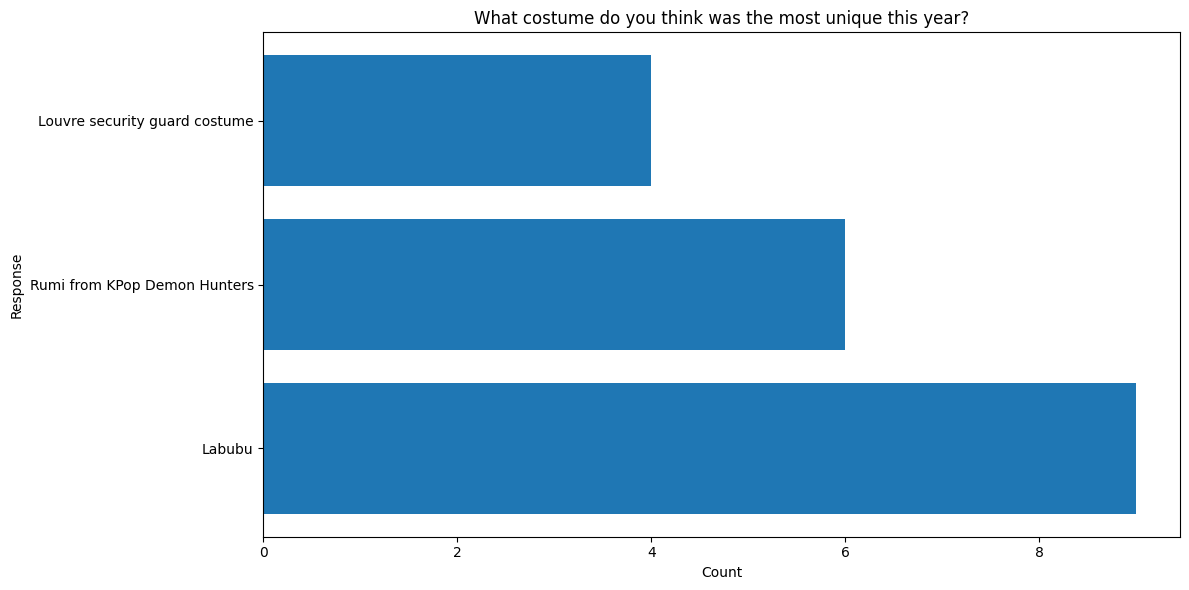

In [16]:
# Plot survey responses using helper function
question_column = config['survey']['question_text']
fig, ax = plot_survey_responses(df, question_column)
plt.show()